### Youtube-Link - https://www.youtube.com/watch?v=PBNimE8ST2E
### Drive-Link - https://drive.google.com/file/d/1_vs_9a0hRKcMtW_RuV1SGhjtadBJ9FF4/view

In [36]:
import gym
import numpy as np
import Pendulum_Policy_Gradient
import matplotlib.pyplot as plt

In [37]:
def test(agent,env,render = False):
    state = env.reset()

    r = 0

    done = False

    while not done:
        action = agent.get_action(state)
        new_state,reward,done,_ = env.step(action)

        if render == True:
            env.render()

        state = new_state

        r += reward


        # print(done)

        # env.render(state)

    env.close()

    print("\n"+str(r))

In [38]:
def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
    # plot the shaded range of the confidence intervals
    plt.fill_between(range(mean.shape[0]),ub, lb,
                     color=color_shading, alpha=.5)
    # plot the mean on top
    plt.plot(mean, color_mean)


def plotting(returns,window_size = 100):
    averaged_returns = np.zeros(len(returns)-window_size+1)
    max_returns = np.zeros(len(returns)-window_size+1)
    min_returns = np.zeros(len(returns)-window_size+1)
    
    
    for i in range(len(averaged_returns)):
        averaged_returns[i] = np.mean(returns[i:i+window_size])
        max_returns[i] = np.max(returns[i:i+window_size])
        min_returns[i] = np.min(returns[i:i+window_size])
    
#     plt.plot(averaged_returns)
    
#     plot_mean_and_CI(averaged_returns,min_returns,max_returns,'g--','g')
    
    return (averaged_returns,max_returns,min_returns)

In [39]:
env = gym.make('Pendulum-v0')

### Vanilla Policy Gradient and Gaussian Policy

- In the previous 'CartPole-v0' environment, we saw how Vanilla Policy gradient is implemented in discrete environment.
- But how do we calculate log_probabilities and hence the gradient of the objective function for continuous action spaces.
- We sample a trajectory $\tau$ according to the policy and assume that the actions are Gaussian distributed with means and standard-deviation computed from a deep neural network.
- We sample action from the Normal/Gaussian distribution, and calculate corresponding log probabilities.
- Rest of the algorithm is same as that for discrete case.

### Relation between Gaussian Policy and Vanilla Policy Gradient for Continuous action spaces.

- As we can see,that procedure followed in Gaussian Policy is exactly same as that followed in Vanilla Policy Gradient, so we donot need to write separate code for Gaussian Policy Gradient.

### Vanilla Policy Gradient Without Baseline

In [23]:
agent_VPG_without_baseline = Pendulum_Policy_Gradient.Pendulum_Agent(env)
reward_history = agent_VPG_without_baseline.train(max_episodes = 10000,baseline = False)

Episode: 9900, Episode Reward: tensor([-1258.0800]), Average Reward: -1398.4736328125575

### Plot of Average Reward v/s Number of Episodes.

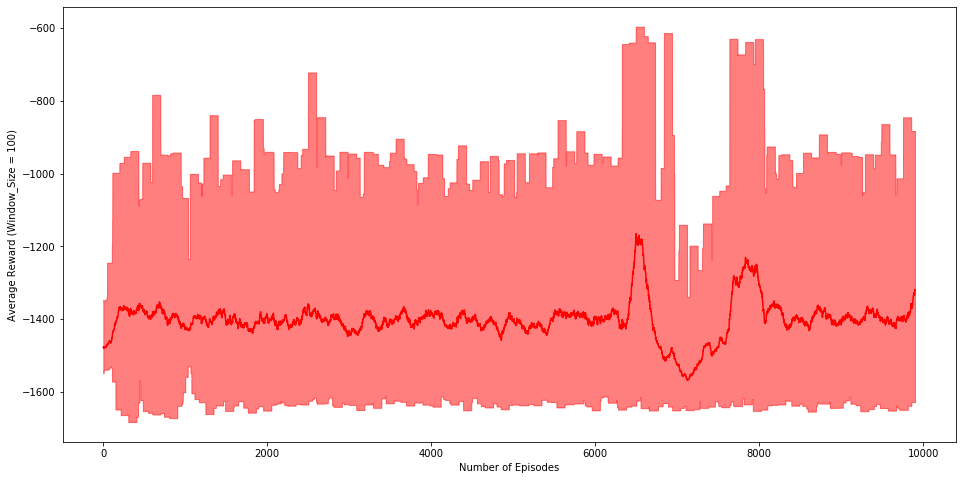

In [24]:
window_size = 100
average, min_returns, max_returns = plotting(reward_history,window_size)
plt.figure(figsize = (16,8))
plot_mean_and_CI(average,min_returns,max_returns,'r','r')
plt.xlabel("Number of Episodes")
plt.ylabel("Average Reward (Window_Size = {})".format(window_size))
plt.show()

### Length of Episode v/s Number of Episodes.

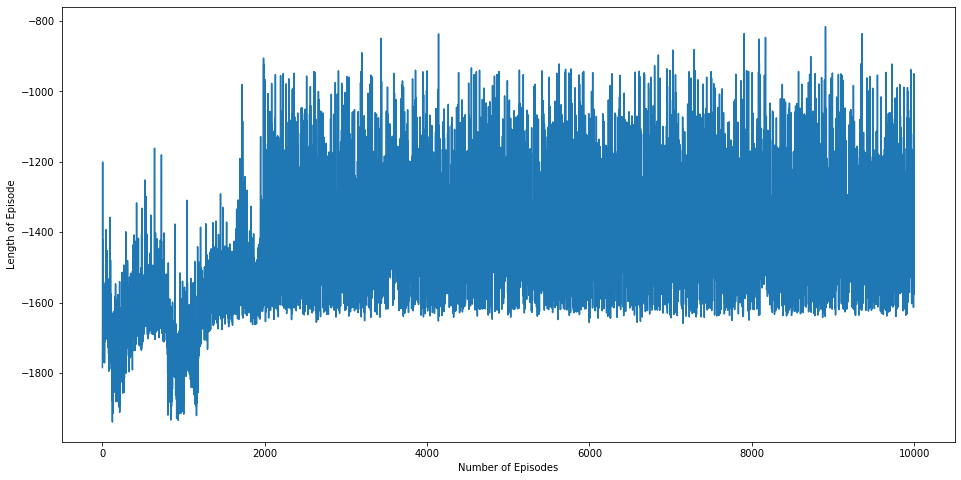

In [33]:
plt.figure(figsize = (16,8))
plt.plot(reward_history)
plt.ylabel("Length of Episode")
plt.xlabel("Number of Episodes")
plt.show()

### Testing

In [27]:
for i in range(10):
    test(agent_VPG_without_baseline,env,False)


tensor([[-1054.7742]])

tensor([[-1369.9258]])

tensor([[-1185.1880]])

tensor([[-1276.1390]])

tensor([[-1256.3987]])

tensor([[-1527.2533]])

tensor([[-1617.9536]])

tensor([[-1521.4229]])

tensor([[-1176.4061]])

tensor([[-1259.4884]])


### Vanilla Policy Gradient with Baseline

- We use baseline $b = mean(discounted\_rewards)$, and implement the Vanilla Policy gradient as given above.

In [25]:
agent_VPG_with_baseline = Pendulum_Policy_Gradient.Pendulum_Agent(env)
reward_history = agent_VPG_with_baseline.train(max_episodes = 10000,baseline = True)

Episode: 9900, Episode Reward: tensor([-1538.6946]), Average Reward: -1394.8070068359375

### Average Reward v/s Number of Episodes.

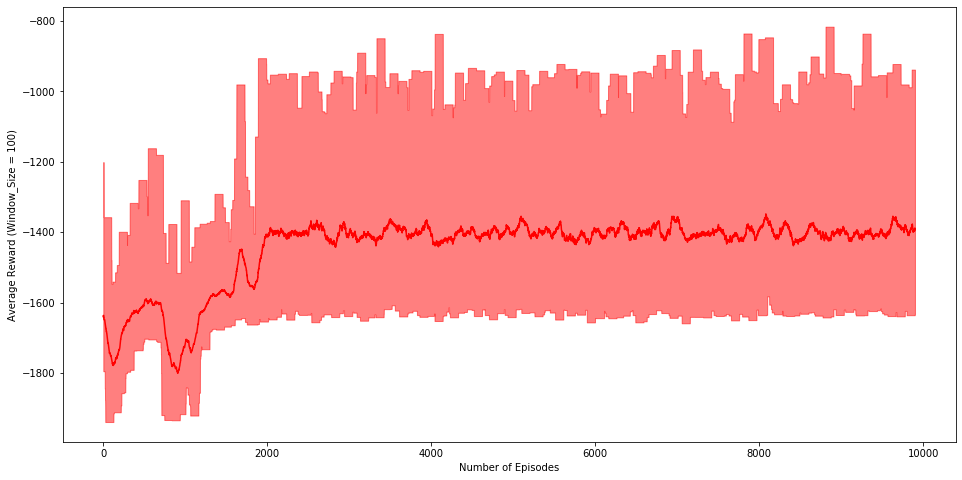

In [26]:
window_size = 100
average, min_returns, max_returns = plotting(reward_history,window_size)
plt.figure(figsize = (16,8))
plot_mean_and_CI(average,min_returns,`max_returns,'r','r')
plt.xlabel("Number of Episodes")
plt.ylabel("Average Reward (Window_Size = {})".format(window_size))
plt.show()

### Length of Reward v/s Number of Episodes.

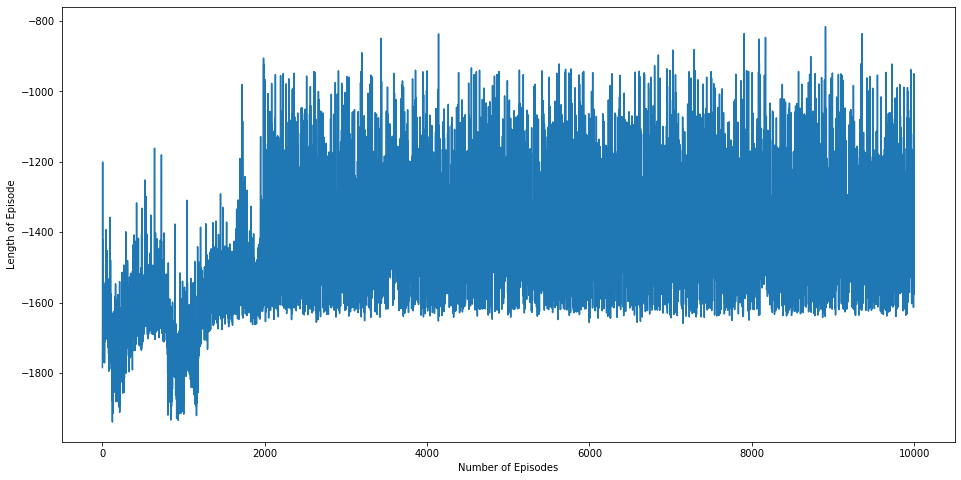

In [35]:
plt.figure(figsize = (16,8))
plt.plot(reward_history)
plt.ylabel("Length of Episode")
plt.xlabel("Number of Episodes")
plt.show()

### Testing

In [29]:
for i in range(10):
    test(agent_VPG_with_baseline,env,False)


tensor([[-1612.2310]])

tensor([[-1558.1871]])

tensor([[-1507.0358]])

tensor([[-1567.9879]])

tensor([[-1350.3533]])

tensor([[-943.7817]])

tensor([[-1194.2964]])

tensor([[-1471.9576]])

tensor([[-1185.5801]])

tensor([[-1246.1997]])


- As we see,that the above methods are not able to provide satisfactory results.
- So, in order to implement the Actor-Critic method, we use the alorithm named DDPG (Deep Deterministic Policy Gradient)
- It is basically Actor-Critic method for continuous action spaces, but with some additions to ensure stability aand convergence.
- It uses Experience Replay, in order to train the deep neural networks on a ixed batch size.
- Besides, the original Actor and Critic neural networks, it also has target Actor neural network and Critic neural network.
- We use the target networks to track the learned network using soft updates, as taught in class.
\begin{equation}
    \theta^{'} = \tau\theta + (1-\tau)\theta^{'}
\end{equation}

- In discrete action spaces, exploration is done by probabilistically choosing a random action (e.g $\epsilon$-greepy), but for continuous action spaces, exploration is done via adding noise to the action itself (gaussian noise).

### Actor-Critic Method for Pendulum-V0

In [40]:
agent = Pendulum_Policy_Gradient.DDPG(env,learning_rate=1e-4)

In [41]:
reward_history = agent.train(max_timesteps=3e4)

/home/gaurav/Semester_5/SMAI/Hw_20/env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/gaurav/Semester_5/SMAI/Hw_20/env/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Episode: 150, Episode Reward: -240.64409979016554, Average Reward: -912.24055001893211

### Average Rewards v/s Number of Episodes

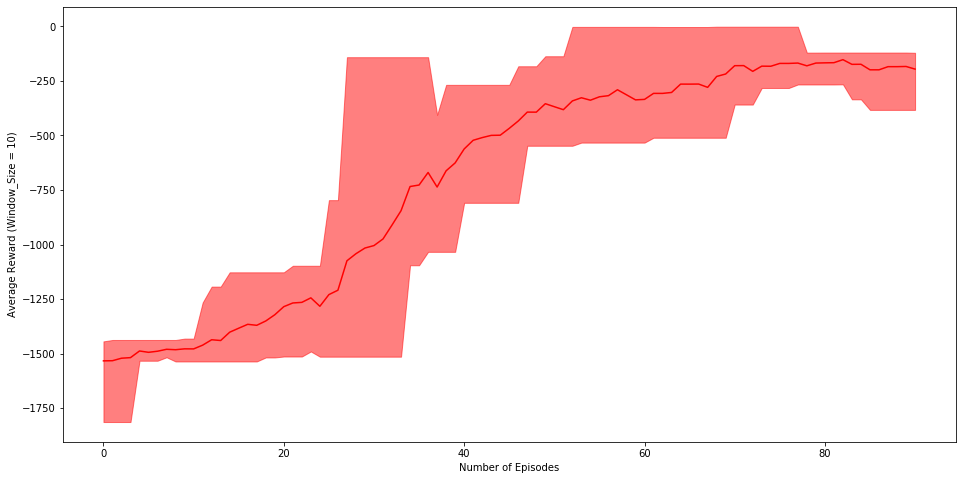

In [42]:
reward_history = reward_history[50:]
window_size = 10
average, min_returns, max_returns = plotting(reward_history,window_size)
plt.figure(figsize = (16,8))
plot_mean_and_CI(average,min_returns,max_returns,'r','r')
plt.xlabel("Number of Episodes")
plt.ylabel("Average Reward (Window_Size = {})".format(window_size))
plt.show()

### Testing

In [45]:
for i in range(10):
    test(agent,env,False)


-232.5035782885598

-251.3543434964979

-2.6869744269828217

-127.71932196414261

-127.10351336863351

-243.4899497328474

-2.6632174490311606

-263.5972142280768

-247.05106284082783

-363.78016185187795


In [49]:
test(agent,env,True)


-246.9354285342743


### Refernces
- https://github.com/pytorch/examples/tree/master/reinforcement_learning
- https://towardsdatascience.com/deep-deterministic-policy-gradients-explained-2d94655a9b7b